Darian Balagiu        NIE: 1719581

Moraru Horia-Andrei   NIE: 1720314

Valentin Micu Hontan  NIE: 1718971

In [331]:
# Imports

import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
from tabulate import tabulate

from sklearn.preprocessing import StandardScaler

from sklearn.metrics.pairwise import euclidean_distances

from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


In [332]:
# Import the data as a pandas DataFramd

nba_df =pd.read_csv('../datasets/nba_dataset.csv', index_col=0)
country_codes = pd.read_csv("../datasets/country_code.csv", index_col=0)

#Display the first 5 rows of the data set
nba_df.head()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,Randy Livingston,HOU,22.0,193.04,94.800728,Louisiana State,USA,1996,2,42,...,3.9,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248,1996-97
1,Gaylon Nickerson,WAS,28.0,190.50,86.182480,Northwestern Oklahoma,USA,1994,2,34,...,3.8,1.3,0.3,8.9,0.030,0.111,0.174,0.497,0.043,1996-97
2,George Lynch,VAN,26.0,203.20,103.418976,North Carolina,USA,1993,1,12,...,8.3,6.4,1.9,-8.2,0.106,0.185,0.175,0.512,0.125,1996-97
3,George McCloud,LAL,30.0,203.20,102.058200,Florida State,USA,1989,1,7,...,10.2,2.8,1.7,-2.7,0.027,0.111,0.206,0.527,0.125,1996-97
4,George Zidek,DEN,23.0,213.36,119.748288,UCLA,USA,1995,1,22,...,2.8,1.7,0.3,-14.1,0.102,0.169,0.195,0.500,0.064,1996-97


In [333]:
print(f'Number of players and features are: {nba_df.shape}')

Number of players and features are: (12844, 21)


Check data types and if any records are missing

In [334]:
nba_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12844 entries, 0 to 12843
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   player_name        12844 non-null  object 
 1   team_abbreviation  12844 non-null  object 
 2   age                12844 non-null  float64
 3   player_height      12844 non-null  float64
 4   player_weight      12844 non-null  float64
 5   college            10990 non-null  object 
 6   country            12844 non-null  object 
 7   draft_year         12844 non-null  object 
 8   draft_round        12844 non-null  object 
 9   draft_number       12844 non-null  object 
 10  gp                 12844 non-null  int64  
 11  pts                12844 non-null  float64
 12  reb                12844 non-null  float64
 13  ast                12844 non-null  float64
 14  net_rating         12844 non-null  float64
 15  oreb_pct           12844 non-null  float64
 16  dreb_pct           12844 no

Show information about the mean and standard deviation, minimum and maximum values, and the quartiles of the data set

In [335]:
nba_df.describe().drop('count')

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
mean,27.045313,200.555097,100.263279,51.154158,8.212582,3.558486,1.824681,-2.226339,0.054073,0.140646,0.184641,0.513138,0.131595
std,4.339211,9.111090,12.426628,25.084904,6.016573,2.477885,1.800840,12.665124,0.043335,0.062513,0.053545,0.101724,0.094172
min,18.000000,160.020000,60.327736,1.000000,0.000000,0.000000,0.000000,-250.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,193.040000,90.718400,31.000000,3.600000,1.800000,0.600000,-6.400000,0.021000,0.096000,0.149000,0.482000,0.066000
50%,26.000000,200.660000,99.790240,57.000000,6.700000,3.000000,1.200000,-1.300000,0.040000,0.130500,0.181000,0.525000,0.103000
75%,30.000000,208.280000,108.862080,73.000000,11.500000,4.700000,2.400000,3.200000,0.083000,0.179000,0.217000,0.563000,0.179000
max,44.000000,231.140000,163.293120,85.000000,36.100000,16.300000,11.700000,300.000000,1.000000,1.000000,1.000000,1.500000,1.000000


In [336]:
categoricals = nba_df.select_dtypes(exclude=[np.number])
categoricals.describe().drop(columns=['draft_year', 'draft_round', 'draft_number'])

,player_name,team_abbreviation,college,country,season
count,12844,12844,10990,12844,12844
unique,2551,36,356,82,27
top,Vince Carter,CLE,Kentucky,USA,2021-22
freq,22,450,447,10721,605


 We can notice that there are 2551 unique players over the course of 27 seasons.

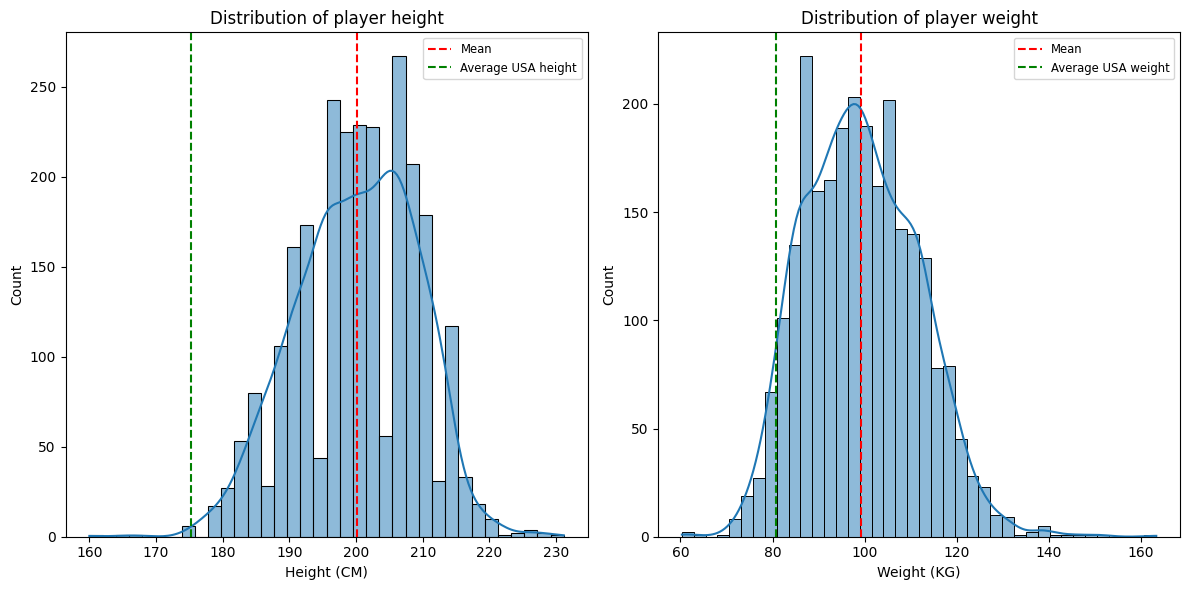

In [337]:
average_male_adult_height = 175.3 # Measured in cm for USA according to Wikipedia
average_male_adult_weight = 80.7 # Measured in kg for USA according to Wikipedia


# Calculate heigh and weight averages

height_weight = nba_df.groupby('player_name', as_index=False).agg({'player_height': 'mean', 'player_weight':'mean'})

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the distribution of player height
sns.histplot(height_weight['player_height'], kde=True, ax=axes[0])
axes[0].axvline(x=height_weight['player_height'].mean(), color='r', linestyle='--', label='Mean')
axes[0].axvline(x=average_male_adult_height, color='g', linestyle='--', label='Average USA height')
axes[0].set_title('Distribution of player height')
axes[0].set_xlabel('Height (CM)')
axes[0].set_ylabel('Count')
axes[0].legend(fontsize='small')


# Plot the distribution of player weight
sns.histplot(height_weight['player_weight'], kde=True, ax=axes[1])
axes[1].axvline(x=height_weight['player_weight'].mean(), color='r', linestyle='--', label='Mean')
axes[1].axvline(x=average_male_adult_weight, color='g', linestyle='--', label='Average USA weight')
axes[1].set_title('Distribution of player weight')
axes[1].set_xlabel('Weight (KG)')
axes[1].set_ylabel('Count')
axes[1].legend(fontsize='small')

plt.tight_layout()
plt.show()

We can see that both, height and weight, are distributed normally in the NBA.

However, it is clear that NBA athletes stand out in terms of their height and weight when compared to regular adult males.

In [338]:
# Create interactive plot for height and weight
fig = px.scatter(height_weight, x='player_weight', y='player_height',
                 title='Height vs Weight of NBA Players',
                 labels={'player_weight': 'Weight (KG)', 'player_height': 'Height (CM)'},
                 hover_name='player_name',
                 hover_data={'player_weight': True, 'player_height': True},)

fig.update_traces(marker=dict(size=8, color='rgba(135, 206, 250, 0.5)', line=dict(width=1, color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

fig.show()

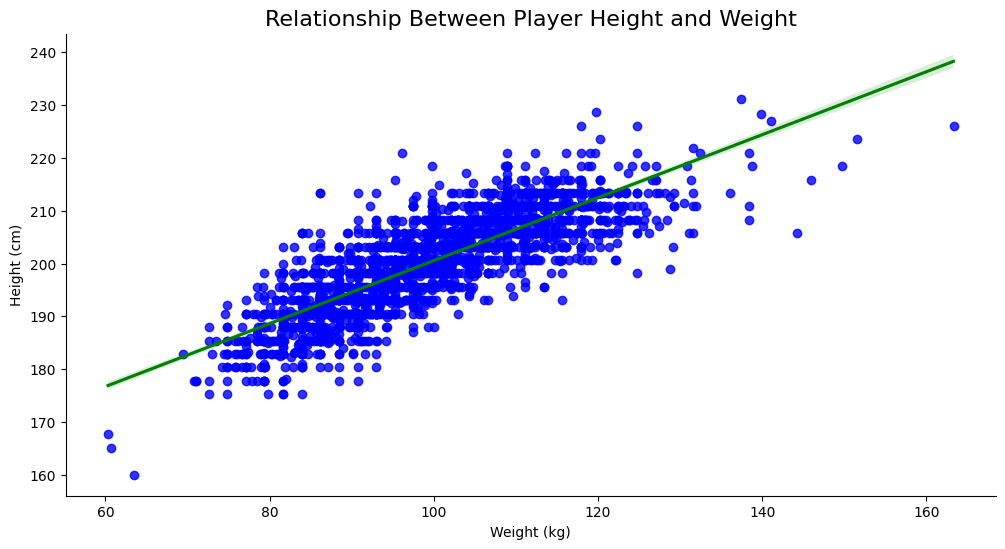

In [339]:
plt.figure(figsize=(12, 6))

sns.regplot(x='player_weight', y='player_height', data=height_weight, color='blue', line_kws={'color': 'green'})

plt.title('Relationship Between Player Height and Weight', fontsize=16)
plt.ylabel('Height (cm)')
plt.xlabel('Weight (kg)')
sns.despine()

plt.show()

We can notice that the tallest player ever to step on the NBA floor was Gheorghe Muresan with a hight of 231cm and HE WAS A ROMANIAN!

We can also notice that the shortest player is Muggsy Bogues standing at 160cm

In [340]:
corr = stats.pearsonr(height_weight['player_height'], height_weight['player_weight'])

print(f"Correlation between player height and weight is: {corr[0]}. The statistical significance of this relationship is {corr[1]}")

Correlation between player height and weight is: 0.8150902497917963. The statistical significance of this relationship is 0.0


To calculate similarity between weight and height, we have used the Pearson correlation formula:

$sim(a, b) = \frac{\sum_{p \in P} (r_{a,p}-\hat{r_a}) (r_{b,p}-\hat{r_b}) }{\sqrt{\sum_{p \in P} (r_{a,p}-\hat{r_a})^2} \sqrt{\sum_{p \in P} (r_{b,p}-\hat{r_b})^2} }$

Not surprisingly, height and weight are two closely related variables.

Showing the correlation between the height and weight of players for each season.

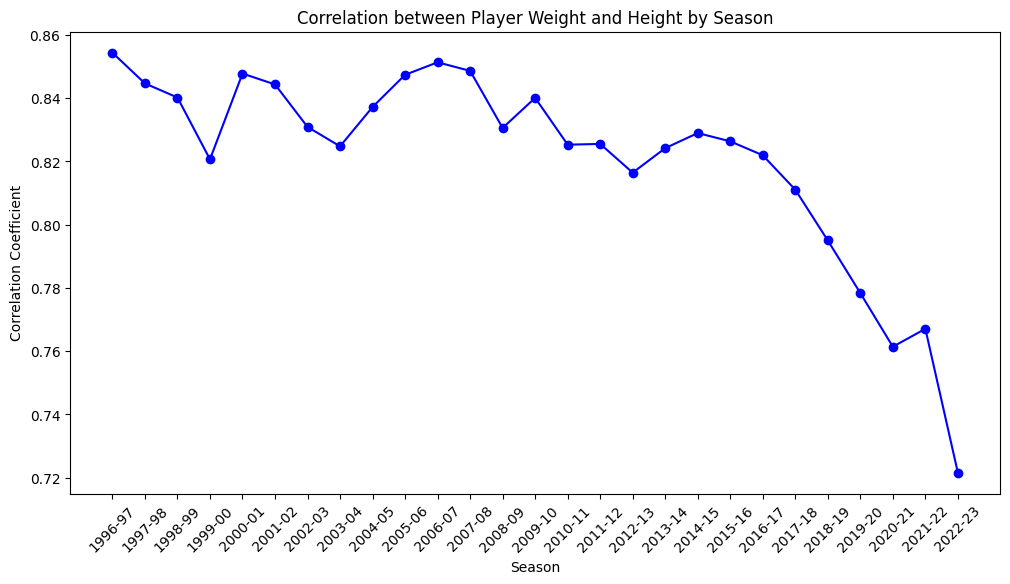

In [341]:
corr_seasons = nba_df.groupby('season')[['player_weight', 'player_height']].corr().unstack().iloc[:, 2]

corr_df = corr_seasons.reset_index()
corr_df.columns = ['season', 'correlation']

plt.figure(figsize=(12, 6))
plt.plot(corr_df['season'], corr_df['correlation'], marker='o', linestyle='-', color='blue')
plt.title('Correlation between Player Weight and Height by Season')
plt.xlabel('Season')
plt.ylabel('Correlation Coefficient')
plt.grid(False)
plt.xticks(rotation=45)
plt.show()

It is interesting to notice that the correlation between height and weight has decreased over the years, as NBA players body types are changing

In [342]:
relevant_df =nba_df[['player_name', 'player_height', 'player_weight', 'country', 'season']]
# Selecting the players stats when they first entered the league
df_first_season = relevant_df.loc[relevant_df.groupby('player_name')['season'].idxmin()]

geography_df = df_first_season.groupby('country', as_index=False).agg({'player_name': 'count', 'player_height': 'mean', 'player_weight': 'mean'})
country_codes.rename(columns={'Country_name': 'country'}, inplace=True)
geography_df = pd.merge(geography_df, country_codes, how='inner', on='country')
geography_df.rename(columns={'player_name': 'count'}, inplace=True)

weight_map = px.choropleth(geography_df, locations='code_3digit', color='player_weight', hover_name='country', color_continuous_scale='Viridis',
                    projection='equirectangular', title='Average Players Weight by Country', width=1000, height=500, labels={'player_weight': 'Weight'},
                    hover_data={'code_3digit': False})
weight_map.show()

height_map = px.choropleth(geography_df, locations='code_3digit', color='player_height', hover_name='country', color_continuous_scale='Viridis',
                    projection='equirectangular', title='Average Players Height by Country', width=1000, height=500, labels={'player_height': 'Height'},
                    hover_data={'code_3digit': False})
height_map.show()

We can above how the height and weight are distributed along all the countries in the world, and additionaly a good way to visualize the NBA player distributions on the globe

Let us now check how the height and weight affects each player`s performance

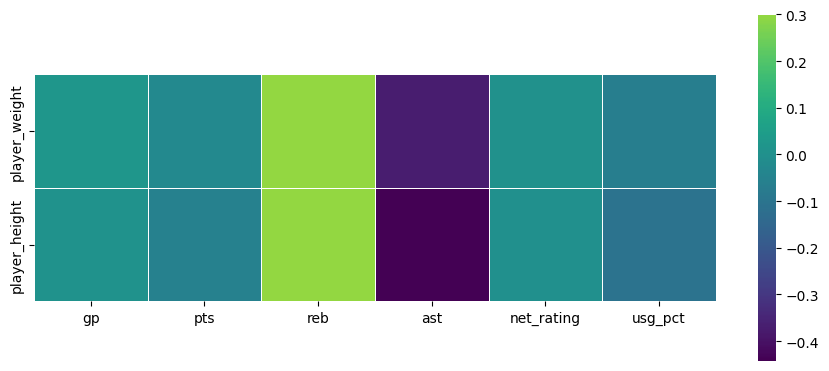

In [343]:
df_corr = nba_df[['gp', 'pts', 'reb', 'ast', 'net_rating', 'usg_pct', 'player_weight', 'player_height']]
corr = df_corr.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Use the viridis colormap
cmap = sns.color_palette("viridis", as_cmap=True)

sns.heatmap(corr.iloc[-2:, :6], cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

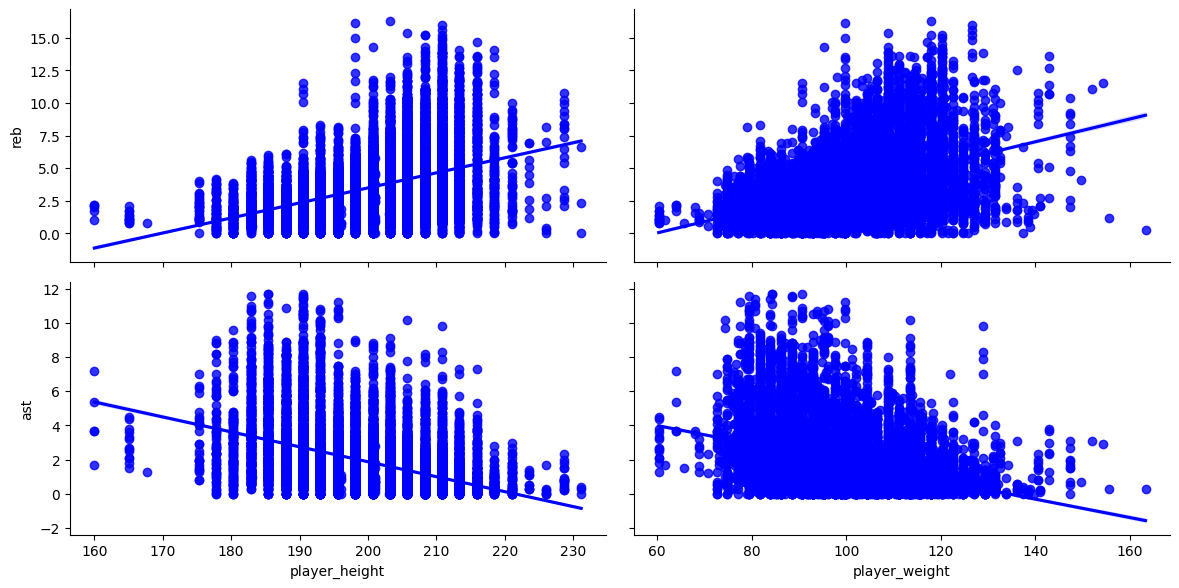

In [344]:
g = sns.PairGrid(df_corr, y_vars=['reb','ast'], x_vars=["player_height", "player_weight"], height=3, aspect=2)
g.map(sns.regplot, color='blue')
plt.show()

Neither height or weight seem to have significant impact on the total games played and average points scored. However, as expected, height and weight do impact average assist and rebound statistics.

In [345]:
corr_w_r = nba_df.groupby('season')[['player_weight','reb']].corr().unstack().iloc[:,1]
corr_w_a = nba_df.groupby('season')[['player_weight','ast']].corr().unstack().iloc[:,1]

corr_h_r = nba_df.groupby('season')[['player_height','reb']].corr().unstack().iloc[:,1]
corr_h_a = nba_df.groupby('season')[['player_height','ast']].corr().unstack().iloc[:,1]

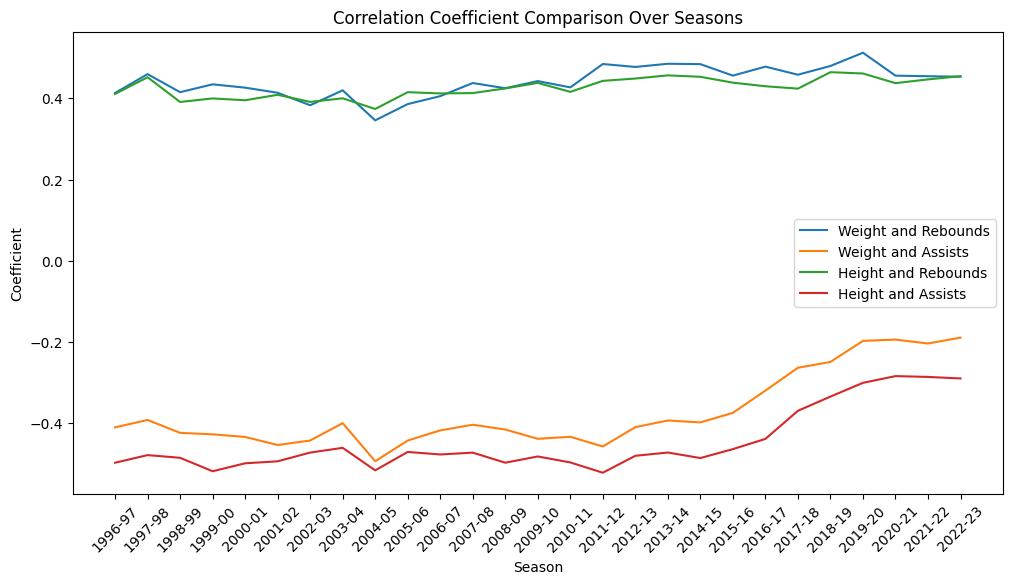

In [346]:
plt.figure(figsize=(12, 6))

# Plotting each correlation over time
plt.plot(corr_w_r.index, corr_w_r.values, label='Weight and Rebounds')
plt.plot(corr_w_a.index, corr_w_a.values, label='Weight and Assists')
plt.plot(corr_h_r.index, corr_h_r.values, label='Height and Rebounds')
plt.plot(corr_h_a.index, corr_h_a.values, label='Height and Assists')

# Adding title and labels
plt.title('Correlation Coefficient Comparison Over Seasons')
plt.xlabel('Season')
plt.ylabel('Coefficient')

# Adding legend
plt.legend()

# Setting background color
plt.gca().set_facecolor('white')

plt.xticks(rotation=45)

# Show plot
plt.show()

Rebound coefficients are stable. However, the negative correlation for assists (the higher or heavier the player is the less assists he makes) has been reducing since 2011. This illustrates how the game is changing and the bigs are becoming a more integral to the overall playmaking of the team.

#  Principal Component Analysis and Standardization

We first want to apply standardization on all the numerical data, so we must first remove all the non-numerical values from the dataframe.

The purpose of standardization is to transform the data so that it has a mean of 0 and a std of 1.

In [347]:
int_df = nba_df.select_dtypes(include=['float64', 'int64'])

# Only consider the players who have played more than 10 games
int_df = int_df[int_df['gp'] > 10]

# Standardize the features
X = int_df.values
X = StandardScaler().fit_transform(X)

Using Principal Component Analysis for reducing the dimensionality of the data in order to optimize the result of the clustering and for simplifying visualization.

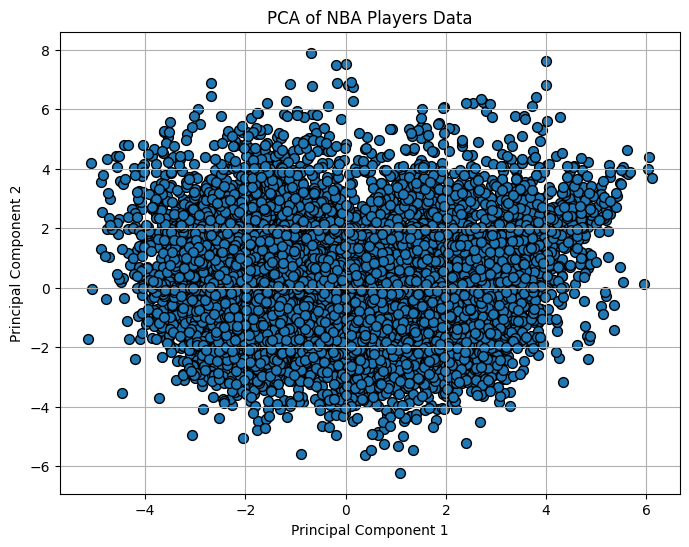

In [348]:
# Perform PCA with 2 components
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)

# Create a DataFrame for the principal components and the standardized data
principal_df = pd.DataFrame(data=principalComponents, columns=['Principal Component 1', 'Principal Component 2'])
X_std = pd.DataFrame(data=X, columns=int_df.columns)

# Plot the PCA-transformed data
plt.figure(figsize=(8, 6))
plt.scatter(principal_df['Principal Component 1'], principal_df['Principal Component 2'], edgecolor='k', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of NBA Players Data')
plt.grid()
plt.show()

# Examine the PCA loadings
loadings = pd.DataFrame(pca.components_.T, columns=['Principal Component 1', 'Principal Component 2'], index=int_df.columns)

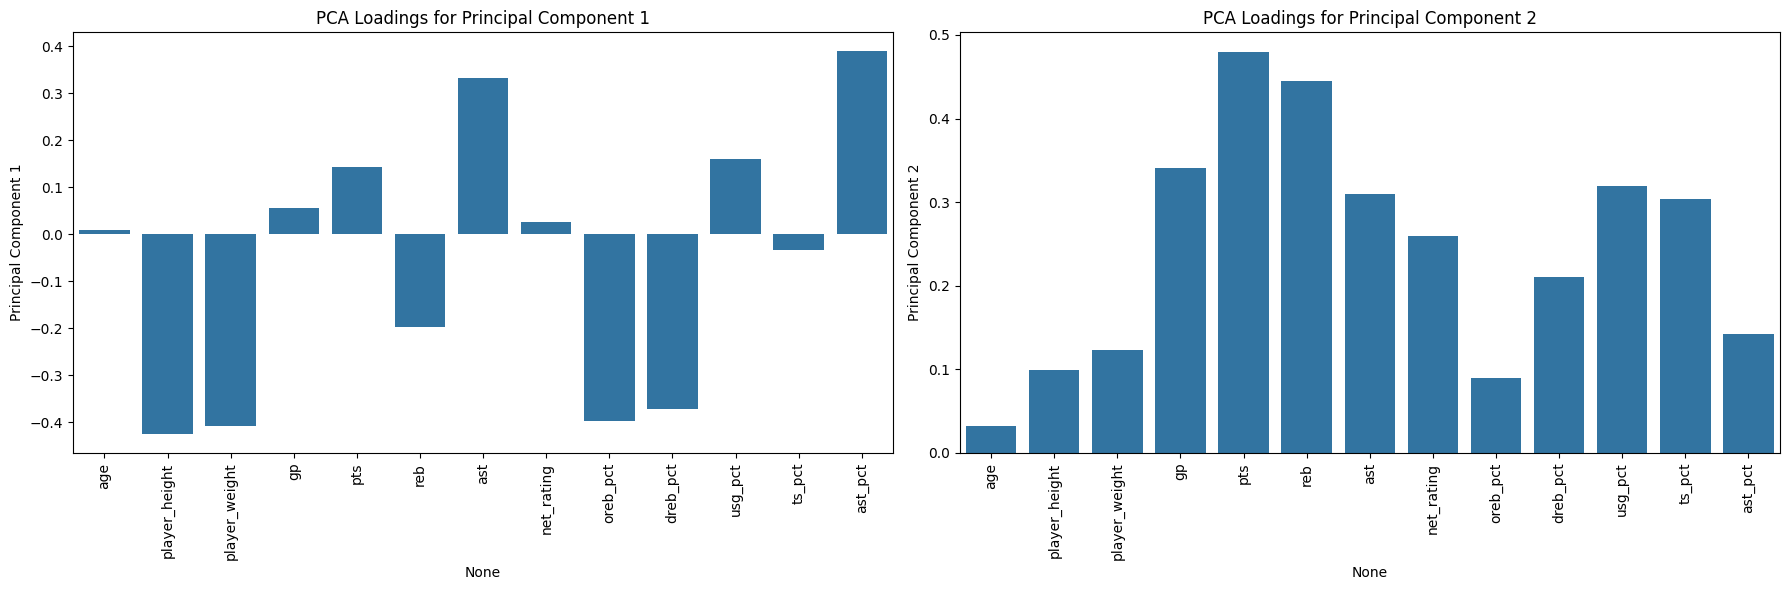

In [349]:
fig, axes = plt.subplots(ncols=2, figsize=(18, 6))

# Plot the loadings for Principal Component 1
sns.barplot(ax=axes[0], x=loadings.index, y=loadings['Principal Component 1'])
axes[0].set_title('PCA Loadings for Principal Component 1')
axes[0].set_xticks(range(len(loadings.index)))
axes[0].set_xticklabels(loadings.index, rotation=90)

# Plot the loadings for Principal Component 2
sns.barplot(ax=axes[1], x=loadings.index, y=loadings['Principal Component 2'])
axes[1].set_title('PCA Loadings for Principal Component 2')
axes[1].set_xticks(range(len(loadings.index)))
axes[1].set_xticklabels(loadings.index, rotation=90)

plt.tight_layout()
plt.show()

Here we can visualize how each feature influents each principal component.

Principal Component 1 is heavily influenced by physical attributes (player_height, player_weight), offensive rebounds (oreb_pct), and defensive rebounds (dreb_pct). It is negatively influenced by assist-related metrics (ast, ast_pct). Thus, PC1 might be interpreted as a contrast between physical size/rebounding ability and playmaking ability.

Principal Component 2 is strongly influenced by scoring (pts), rebounding (reb), and games played (gp). These metrics have strong negative contributions, suggesting that PC2 may represent overall player activity and effectiveness in games.

# KMEANS Clustering

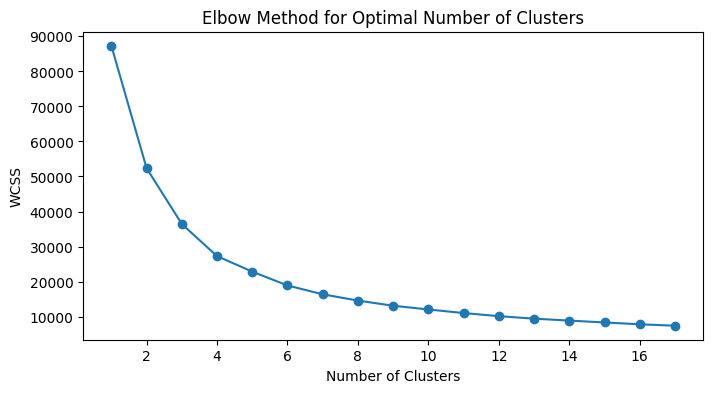

In [350]:
# Elbow Method
wcss = []
for i in range(1, 18):
    kmeans =KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=42)
    kmeans.fit(principal_df)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, 18), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

By examining the Elbow plot, we can determine the optimal number of clusters where adding more clusters doesn't significantly reduce WCSS, indicating compact and well-defined clusters.

The optimal number of clusters in this case would be 10.

In [351]:
kmeans =KMeans(n_clusters=10, init='k-means++', n_init=10, max_iter=500, random_state=42)
y_kmeans = kmeans.fit_predict(principalComponents)

In [352]:
principal_df['cluster'] =y_kmeans
principal_df_name = principal_df.copy()
principal_df_name['player_name'] = nba_df['player_name']
principal_df_name.rename(columns={'Principal Component 1': 'Physical Attributes', 'Principal Component 2': 'Playmaking Skills'}, inplace=True)

def plot_clusters(df):
  plot = px.scatter(
      df,
      x='Physical Attributes',
      y='Playmaking Skills',
      color='cluster',
      hover_data=['player_name'],
      title='Clusters of NBA Players',
      color_continuous_scale=px.colors.sequential.Viridis
  )

  plot.show()

plot_clusters(principal_df_name)

We can notice there are a few outliers in the plot, such as Steven Hill or Jerrelle Benimon belonging to cluster 7.

We can visibly see that the reason for this is having very high physical attributes compared to the other players and low playmaking skills.

In [353]:
mean_stats_name = nba_df.groupby('player_name')[int_df.columns].mean().reset_index()
mean_stats = mean_stats_name.drop('player_name', axis=1)

X_mean = mean_stats.values
X_mean = StandardScaler().fit_transform(X_mean)

pca = PCA(n_components=2)
principalComponentsMean = pca.fit_transform(X_mean)

# Create a DataFrame for the principal components and the standardized data
principal_df_mean = pd.DataFrame(data=principalComponentsMean, columns=['Physical Attributes', 'Playmaking Skills'])

In [354]:
kmeans = KMeans(n_clusters=10, init='k-means++', n_init=10, max_iter=500, random_state=42)
y_kmeans = kmeans.fit_predict(principalComponentsMean)

principal_df_mean['cluster'] =y_kmeans
principal_df_mean_name = principal_df_mean.copy()
principal_df_mean_name['player_name'] = mean_stats_name['player_name']

plot_clusters(principal_df_mean_name)

In [355]:
mean_stats['cluster'] = y_kmeans

num_cols = 5

num_rows = math.ceil((len(mean_stats.columns) - 1) / num_cols)

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows))
axes = axes.flatten()

plot_count = 0

for i, column in enumerate(mean_stats.columns):
    if column != 'cluster':  # Skip the 'cluster' column itself
        sns.histplot(data=mean_stats, x=column, hue='cluster', multiple='stack', palette='viridis', ax=axes[plot_count])
        axes[plot_count].set_title(f'Distribution of {column} by Cluster')
        axes[plot_count].set_xlabel(column)
        axes[plot_count].set_ylabel('Count')
        plot_count += 1

# Remove any unused subplots
for j in range(plot_count, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Here we noticed that the players in the data set may appear more than once, because it is taken season-wise. So what we tried to was to combine all the player`s statistics from all the seaons into one, so ultimatelly the player would only appear once.

Even though some players were formerly belonging to multiple clusters and now belonging to one singular cluster, the clusters seem just as widely spread as the before scatter plot which is interesting.

This somehow denotes that the majority of players were consistent throughout the seasons, with a few minor exceptions.

In [ ]:
kmeans = KMeans(n_clusters=10, n_init=100, max_iter=500, random_state=42)

y_kmeans = kmeans.fit_predict(X_mean)

mean_stats['cluster'] = y_kmeans

mean_stats.groupby('cluster').mean().sort_values(by='player_height')

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
cluster,,,,,,,,,,,,,
9,27.894545,188.500802,85.425098,56.257620,8.001572,2.196768,3.362229,-1.972132,0.020508,0.090417,0.187579,0.508339,0.250059
5,24.861879,188.793981,85.415061,22.014293,3.291832,1.026661,1.331458,-6.680950,0.022909,0.087387,0.188118,0.453703,0.220474
7,26.442126,195.443503,94.284062,63.679312,17.757756,4.666382,4.930870,1.430924,0.029860,0.122117,0.246311,0.549245,0.244225
2,25.299518,198.900608,96.790365,56.659788,8.203101,2.984108,1.436230,-2.253193,0.034907,0.117331,0.176848,0.528658,0.103589
0,24.213020,199.223194,95.865080,18.129380,2.968256,1.428166,0.521679,-2.937097,0.040767,0.111334,0.167315,0.459442,0.079407
6,24.478125,201.369083,100.351560,4.896181,0.633264,0.572917,0.203125,-49.189757,0.032348,0.083930,0.155066,0.131452,0.064241
8,23.000000,205.192000,108.926790,1.400000,1.600000,1.600000,0.000000,48.900000,0.513200,0.194200,0.255400,0.466800,0.000000
4,31.908222,205.703090,107.163479,49.856470,4.779303,3.071449,0.799914,-2.052453,0.071932,0.151032,0.152991,0.499990,0.078147
3,24.575706,208.852857,111.338079,28.609391,3.192444,2.572537,0.396220,-5.322366,0.098966,0.187567,0.165349,0.492621,0.061669


Here we can see how the NBA players are getting clustered without the PCA. The most predominant feature seems to also be the weight and the height of the player, which is the denominator based on which players are getting clustered. As the height goes up, the weight also goes up, which seem to be logical based on the strong correlation between these two features

As for the PCA K-Means clustering, the players got clustered based on physical attributes and on their performance and playmaking abilities, without the PCA things appear to be much more straight forward, where the most important features are the height and the weight, and the overall performance of the players in each cluster seems to not be taken into account.

# Hierarhical Clustering

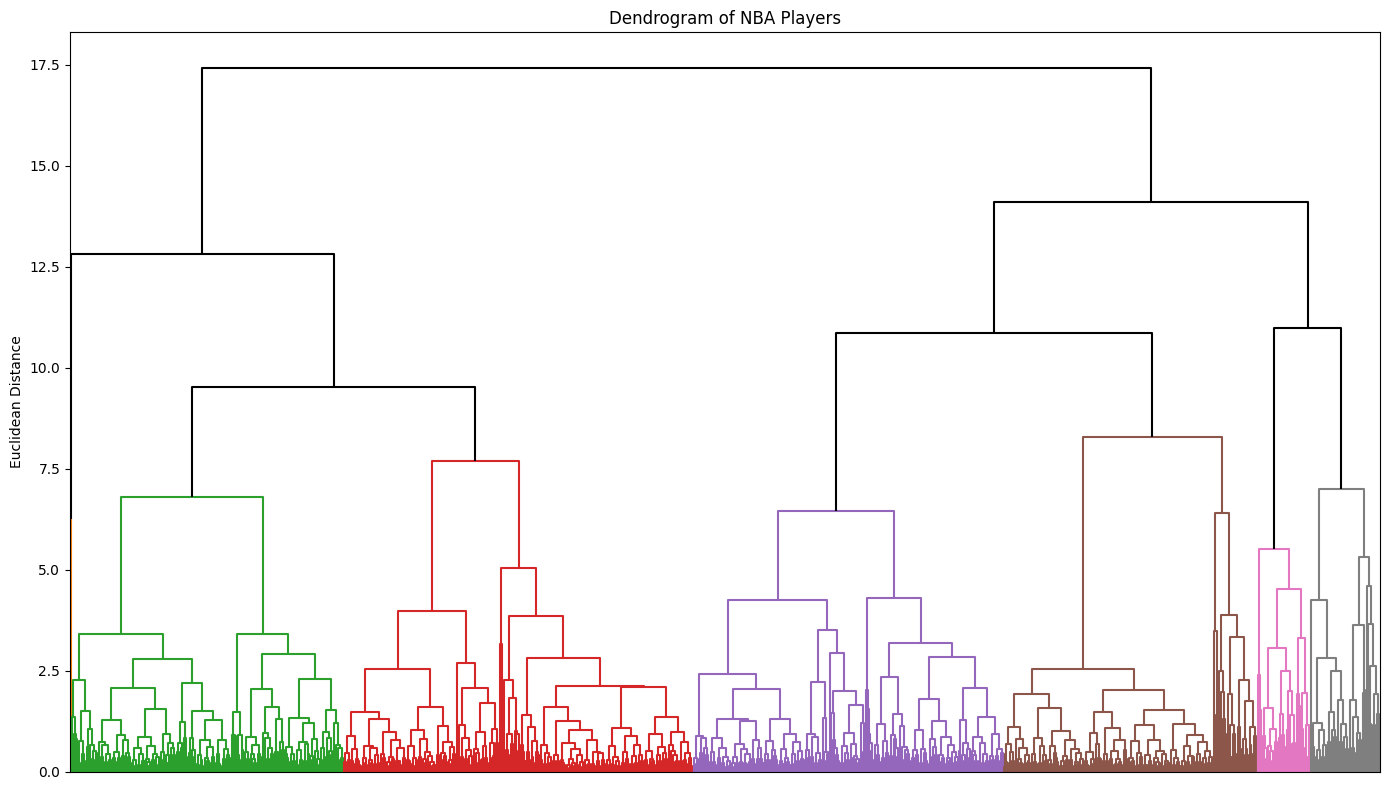

In [ ]:
row_clusters = linkage(principal_df_mean, method='complete', metric='euclidean')
plt.figure(figsize=(14, 8))

dendrogram(
    row_clusters,
    labels=principal_df_mean.index,
    orientation='top',
    leaf_font_size=10,
    above_threshold_color='black',
    color_threshold=0.5 * max(row_clusters[:, 2])
)

plt.xticks([])

plt.title('Dendrogram of NBA Players')
plt.ylabel('Euclidean Distance')

plt.tight_layout()

plt.show()

In [ ]:
hc = AgglomerativeClustering(n_clusters=10, linkage='complete', metric='euclidean')
y_hc = hc.fit_predict(principalComponentsMean)

In [ ]:
principal_df_mean_name['cluster'] =y_hc
plot_clusters(principal_df_mean_name)

For the hierarchical clustering, we can see that the outliers are much more flagrant. The Cluster 6 for example only contains 2 players, which seem to be far more away in the scatter plot than the rest of the players. These things, even thought visible in the K-Means scatter plot was not as greatly showcased as in the hierarchical clustering.

In [ ]:
principal_df_mean['cluster'] =y_hc
principal_df_mean.groupby('cluster').mean().sort_values(by='Physical Attributes')

,Physical Attributes,Playmaking Skills
cluster,,
1,-4.013178,1.821335
6,-2.937904,4.219145
7,-2.359618,-5.790574
3,-2.003309,-1.097779
8,-0.049040,0.682683
4,0.229884,4.302935
0,0.793064,-1.751052
9,1.650666,2.652487
2,2.459448,0.118738


# Recommendation System using K-Means for finding similarities

In [ ]:
principal_df_mean['cluster'] = y_kmeans

In [ ]:
def recommend_players(player_name, num_recommendations=5):
    """
    Recommends similar players to the given player based on their statistical features.

    Parameters:
    - player_name (str): The name of the player for whom recommendations are to be made.
    - num_recommendations (int): The number of similar players to recommend (excluding the player itself).
    """
    # Check if the player exists in the dataset
    if player_name not in mean_stats_name['player_name'].values:
        print(f"Player {player_name} not found in the dataset.")
        return

    # Take the last season the player ever played in
    player_index = mean_stats_name[mean_stats_name['player_name'] == player_name].index[-1]

    # Get the cluster of the player
    player_cluster = principal_df_mean.loc[player_index, 'cluster']

    # Get all players in the same cluster
    cluster_players = principal_df_mean[principal_df_mean['cluster'] == player_cluster].index

    # Remove the player itself from the recommendations
    cluster_players = cluster_players[cluster_players != player_index]

    # Calculate distances between the given player and all other players in the cluster
    player_vector = principal_df_mean.loc[player_index].drop('cluster').values.reshape(1, -1)
    cluster_vectors = principal_df_mean.drop('cluster', axis=1).loc[cluster_players].values
    distances = euclidean_distances(player_vector, cluster_vectors).flatten()

    # Sort players based on their distances
    sorted_indices = distances.argsort()

    # Limit the number of recommendations
    if len(cluster_players) > num_recommendations:
        sorted_indices = sorted_indices[:num_recommendations]

    # Get the recommended player names
    recommended_players = mean_stats_name.loc[cluster_players[sorted_indices], ['player_name']]

    recommendations = pd.DataFrame({
        'player_name': recommended_players['player_name'].values
    })

    print(f"Recommendations for {player_name} are:\n")
    print(tabulate(recommendations, headers='keys', tablefmt='fancy_grid', showindex=False))

In [ ]:
recommend_players('LeBron James', num_recommendations=5)

Recommendations for LeBron James are:

╒═══════════════════╕
│ player_name       │
╞═══════════════════╡
│ Luka Doncic       │
├───────────────────┤
│ Michael Jordan    │
├───────────────────┤
│ James Harden      │
├───────────────────┤
│ Kevin Durant      │
├───────────────────┤
│ Russell Westbrook │
╘═══════════════════╛


This recommendation system identifies and suggests similar players based on their statistical features and the K-Means clustering did above in the notebook.

# Feature Prediction using KNN

In [ ]:
# Define target feature and features
target_feature = 'age'

# Bin the ages into categories
age_bins = [18, 27, 35, 44]
age_labels = ['Young', 'Prime', 'Old']
mean_stats['age_binned'] = pd.cut(mean_stats[target_feature], bins=age_bins, labels=age_labels)


X = mean_stats.drop(columns=[target_feature, 'age_binned'])
y = mean_stats['age_binned']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

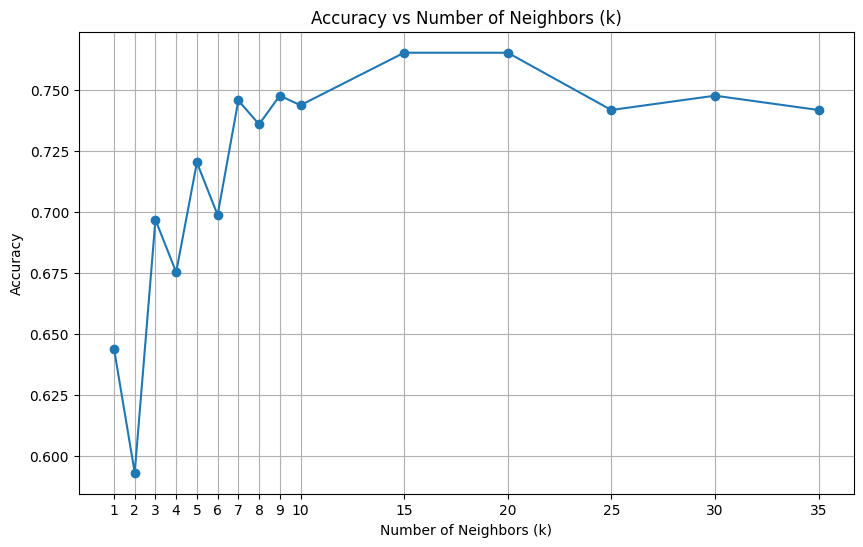

Accuracy of the k-Nearest Neighbors classifier: 0.7651663405088063


In [ ]:
# Define the range of k values
k_range = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35]

# Initialize list to store accuracy scores
accuracies = []

# Loop over values of k for the k-Nearest Neighbor classifier
for k in k_range:
    # Set up the k-NN Classifier with the current value of k
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)

    # Predict on the test set
    y_pred = knn.predict(X_test)

    # Compute accuracy on the test set
    accuracy = accuracy_score(y_test, y_pred)

    # Store the accuracy
    accuracies.append(accuracy)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(k_range, accuracies, marker='o')
plt.title('Accuracy vs Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_range)
plt.grid(True)
plt.show()

knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

# Compute accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the k-Nearest Neighbors classifier: {accuracy}")

We perform a classification task using the k-Nearest Neighbors (k-NN) algorithm on a dataset where the target feature is 'age'. The goal is to categorize individuals into age bins ('Young', 'Prime', 'Old') based on other features in the dataset.

This system predicts the age category of players based on their statistical features, achieving an accuracy of 76%.